# This notebook helps to create the B tree in form of a table

### First createing a dict with each word across all the con files and taking its count

In [42]:
import pandas as pd
import numpy as np
import glob
import re
from nltk.corpus import stopwords
import string
import operator
import itertools

In [2]:
d = dict()
stop = stopwords.words('english') + list(string.punctuation)

In [3]:
for filename in glob.glob('samples/*.con'):
#     print("****************************************************************")
#     print(filename)
#     print("****************************************************************")
    with open(filename) as f:
        for line in f:
            if not line:
                pass
            else:
                if len(line.split("\"")) == 5:
                    temp = line.split("\"")[1]
                    x = temp.translate(None, string.punctuation)
                    temp = x.strip()
        #             temp_arr = [i for i in temp.split() if i not in stop]
                    if temp in d:
                        d[temp] += 1

                    else:
                        d[temp] = 0
                        d[temp] += 1
            


In [4]:
df = pd.DataFrame.from_dict(d, orient='index')
df.columns=['Values']

In [5]:
df = df.sort_values(by=['Values'], ascending=False)

In [6]:
df.head()

,Values
type num diabetes,321
type num diabetes mellitus,306
treatment,267
the study,245
insulin,233


In [110]:
df.drop(df.head(4).index, inplace=True)

In [9]:
df.head

<bound method DataFrame.head of                                                     Values
type num diabetes                                      321
type num diabetes mellitus                             306
treatment                                              267
the study                                              245
insulin                                                233
metformin                                              224
type 2 diabetes mellitus                               178
diabetes                                               162
type 2 diabetes                                        158
type 1 diabetes                                        145
hba1c 0                                                140
hba1c 5                                                138
type 1 diabetes mellitus                               118
body mass index bmi                                     95
hemoglobin                                              89
medications             

### Start creating the table (IGNORE)

In [135]:
# lst = list(itertools.product([0, 1], repeat=6))

In [134]:
# table = {}
# for i in lst:
#     table[i] = []

In [133]:
# table

### Now that we have the table, loading the inclusion_exclusion.csv and searching for the top keywords in each file

In [2]:
inc_ex_df = pd.read_csv('inclusion_exclusion.csv')

In [3]:
inc_ex_df = inc_ex_df.set_index('NCT')

In [4]:
inc_ex_df = inc_ex_df.drop(['Unnamed: 0'], axis=1)

In [5]:
len(inc_ex_df)

904

In [6]:
inc_ex_df.head()

,Exclusion,Inclusion
NCT,,
NCT02325466,: - Subject is pregnant or breast-...,: - Female or male aged ≥ 35 years...
NCT00555217,: - History of intolerance to ACEI...,: - Type 2 diabetes - ...
NCT03211858,NaN,I
NCT02429258,: - For patients who enter the stu...,: - Type 2 diabetes mellitus (T2DM...
NCT01106625,: - History of diabetic ketoacidos...,: - All patients must have a diagn...


### Now search in inclusion and exclusion for 3 features
### Features: hypertension, insulin, metformin 
#### all features have following convention: 0 if not in inclusion or if in exclusion, 1 otherwise

In [7]:
f = pd.DataFrame(columns=['hypertension', 'metformin', 'insulin'])

In [8]:
def findVal(word, criteria):
    if word in criteria.lower():
        return 1
    return 0

In [179]:
import csv

words = ["hypertension", "metformin", "insulin"]
store = dict()
with open("inclusion_exclusion.csv", "r") as file:
    reader = csv.reader(file)
    for row in reader:
        result =[]
        for word in words:
            result.append(findVal(word, row[2]))
        store[row[3]]=result

In [180]:
del(store['NCT'])

In [132]:
# store

### Store dict holds the required table

## Finding out the ranges for bmi

In [63]:
bmi_dict = {}

In [64]:
for filename in glob.glob('samples/*.con'):
#     print("****************************************************************")
#     print(filename)
#     print("****************************************************************")
    with open(filename) as f:
        for line in f:
            if not line:
                pass
            else:
                bmi_line = re.findall(r'bmi [0-9]*', line)
                if bmi_line:
                    # Here we have all those string which have bmi and some value in them
                    digit = re.findall(r'\d+', bmi_line[0])
                    if digit:
                        digit = int(digit[0])
#                     print(digit)
                        name = filename.split("/")
                        name = name[1].split(".")[0]
                        bmi_dict.update({name:digit})
#                     digit = int(filter(str.isdigit, bmi_line[0]))
#                     print(digit)

In [126]:
#bmi_dict

In [127]:
bmi_dataframe = pd.DataFrame.from_dict(bmi_dict, orient='index')

In [128]:
bmi_dataframe.head()

,0
NCT00411892,40
NCT00947557,20
NCT01165684,40
NCT03060980,25
NCT02580591,18


In [181]:
for i in store:
    if i in bmi_dict:
        # Figuring out the ranges
        if bmi_dict[i] < 10:
            store[i].append(0)
        elif 11 < bmi_dict[i] < 20:
            store[i].append(1)
        elif 21 < bmi_dict[i] < 30:
            store[i].append(2)
        elif 31 < bmi_dict[i] < 40:
            store[i].append(3)
        elif 41 < bmi_dict[i] < 50:
            store[i].append(4)
        else:
            store[i].append(5)        
    else:
        store[i].append(0)

In [131]:
len(store)

904

## Now that we have bmi added to store, time to add hbac

In [136]:
hbac_dict = {}

In [151]:
for filename in glob.glob('samples/*.con'):
#     print("****************************************************************")
#     print(filename)
#     print("****************************************************************")
    with open(filename) as f:
        for line in f:
            if not line:
                pass
            else:
                hbac_line = re.findall(r'hba1c [0-9]*', line)
                if hbac_line:
#                     # Here we have all those string which have hbac and some value in them
#                     digit = re.findall(r'\d+', hbac_line[0])
                    digit = int(hbac_line[0].split(" ")[1])
                    name = filename.split("/")
                    name = name[1].split(".")[0]
                    hbac_dict.update({name:digit})

In [153]:
hbac_dataframe = pd.DataFrame.from_dict(hbac_dict, orient='index')

In [157]:
hbac_dataframe.head()

,0
NCT00622284,0
NCT00071422,5
NCT01165684,0
NCT03060980,5
NCT03053518,7


In [174]:
temp2 = np.array(hbac_dataframe[0])

(array([147.,   1.,   0.,   3., 139.,  31.,   9.,   8.,  22.,  38.]),
 array([ 0. ,  1.2,  2.4,  3.6,  4.8,  6. ,  7.2,  8.4,  9.6, 10.8, 12. ]),
 <a list of 10 Patch objects>)

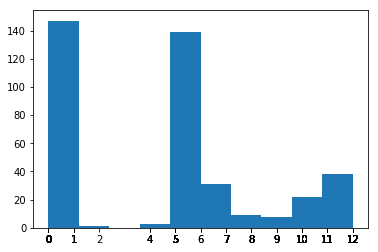

In [170]:
temp2.sort()
import matplotlib.pyplot as plt
plt.xticks(temp2)

plt.hist(temp2)

In [182]:
for i in store:
    if i in hbac_dict:
        # Figuring out the ranges
        if hbac_dict[i] < 5:
            store[i].append(0)
        elif 6 < hbac_dict[i] < 10:
            store[i].append(1)
        elif 11 < hbac_dict[i] < 15:
            store[i].append(2) 
        else:
            store[i].append(0)
    else:
        store[i].append(0)

In [183]:
store

{'NCT00000620': [0, 0, 0, 0, 0],
 'NCT00004984': [0, 0, 0, 0, 0],
 'NCT00005479': [0, 0, 0, 0, 0],
 'NCT00011141': [0, 0, 0, 0, 0],
 'NCT00011531': [0, 0, 0, 0, 0],
 'NCT00013741': [1, 0, 0, 0, 0],
 'NCT00015626': [0, 0, 0, 0, 0],
 'NCT00017953': [0, 0, 1, 2, 0],
 'NCT00029848': [0, 0, 0, 2, 0],
 'NCT00035542': [0, 0, 0, 0, 0],
 'NCT00035568': [0, 0, 0, 0, 1],
 'NCT00035984': [0, 1, 0, 2, 0],
 'NCT00036504': [0, 0, 1, 0, 0],
 'NCT00039013': [0, 1, 0, 2, 0],
 'NCT00039026': [0, 0, 0, 2, 0],
 'NCT00044148': [0, 0, 0, 0, 0],
 'NCT00044395': [0, 0, 1, 0, 2],
 'NCT00044408': [0, 0, 1, 0, 2],
 'NCT00044421': [0, 0, 1, 0, 2],
 'NCT00056290': [0, 0, 0, 0, 0],
 'NCT00057317': [0, 0, 0, 0, 0],
 'NCT00058981': [0, 1, 1, 5, 0],
 'NCT00060931': [0, 0, 0, 0, 0],
 'NCT00063128': [0, 0, 1, 0, 0],
 'NCT00065312': [0, 1, 0, 0, 0],
 'NCT00067951': [0, 0, 1, 0, 0],
 'NCT00069576': [0, 0, 0, 0, 0],
 'NCT00071422': [0, 0, 0, 0, 0],
 'NCT00071448': [0, 0, 0, 0, 2],
 'NCT00073255': [0, 0, 0, 0, 0],
 'NCT00073